In [2]:
import spot
from spot.jupyter import display_inline
spot.setup(show_default='.bans')

Notebook contains parts of automaton worse_example1.hoa that are not equivalent after optimized simplification L2.

In [3]:
def show_one_difference(left, right):
    run = left.exclusive_run(right)
    if not run:
        print("The two automata are equivalent.")
    else:
        print("The following word is only accepted by one automaton:", spot.make_twa_word(run))
        run.highlight(5)
        display_inline(left, right)

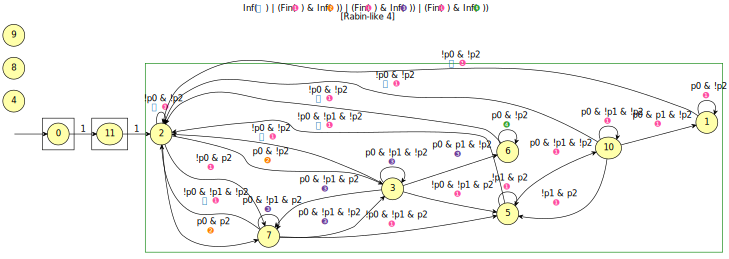

In [4]:
for a in spot.automata('./dnf_sub.hoa'):
    display(a)

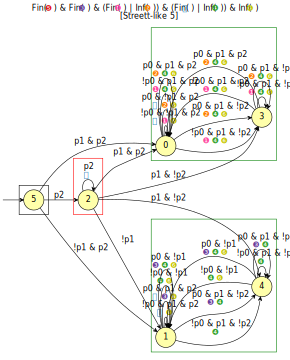

In [5]:
for sub in spot.automata('./sub_worse'):
    display(sub)
    
    

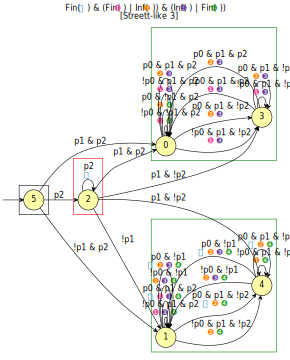

In [9]:
for l1 in spot.automata('./sub_worse.L1'):
    display(l1)

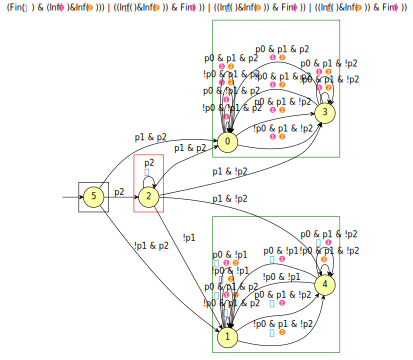

In [10]:
for l2 in spot.automata('./sub_worse.L2'):
    display(l2)

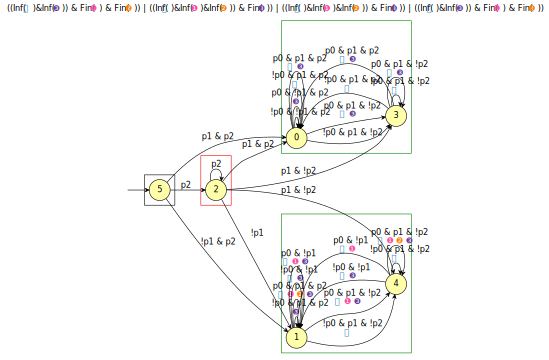

In [12]:
for eq_l2 in spot.automata('./sub_worse.eq.L2'):
    display(eq_l2)

Unoptimized atomaton L2 sub_worse:

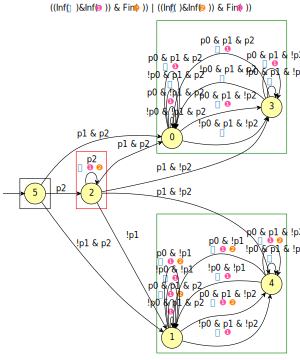

In [13]:
for unopt_l2 in spot.automata('./sub_worse.unopt.L2'):
    display(unopt_l2)

In [11]:
show_one_difference(l1, l2)

The following word is only accepted by one automaton: p1 & p2; !p0 & !p1 & p2; !p0 & p1 & !p2; !p0 & p1 & p2; cycle{!p0 & p1 & p2}


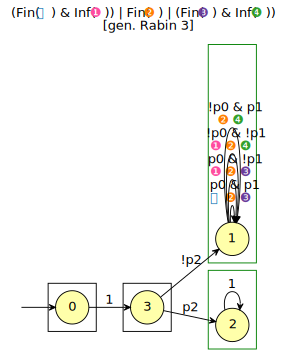

In [17]:
for not_eq in spot.automata('./noteq.hoa'):
    display(not_eq)

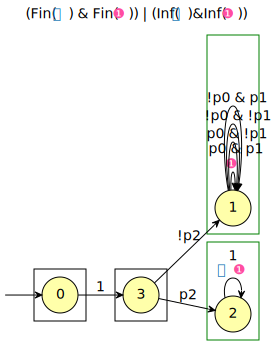

In [18]:
for last_eq in spot.automata('./last_equivalent'):
    display(last_eq)

In [32]:
for scc in spot.scc_info(last_eq):
    print(scc)
    print(type(scc))

<spot.impl.scc_info_node; proxy of <Swig Object of type 'spot::scc_info_node *' at 0x7fd609374900> >
<class 'spot.impl.scc_info_node'>
<spot.impl.scc_info_node; proxy of <Swig Object of type 'spot::scc_info_node *' at 0x7fd6093745a0> >
<class 'spot.impl.scc_info_node'>
<spot.impl.scc_info_node; proxy of <Swig Object of type 'spot::scc_info_node *' at 0x7fd609374c30> >
<class 'spot.impl.scc_info_node'>
<spot.impl.scc_info_node; proxy of <Swig Object of type 'spot::scc_info_node *' at 0x7fd6093747b0> >
<class 'spot.impl.scc_info_node'>


In [35]:
si = spot.scc_info(last_eq)
print(si)
type(si)
print(si.scc_count())

<spot.impl.scc_info; proxy of <Swig Object of type 'spot::scc_info *' at 0x7fd609374b70> >
4


In [52]:
for i in range(si.scc_count()):
    used = si.acc((i))
    print(i, used)
    print(si.used_acc_of(i))

0 {1}
<Swig Object of type 'std::set< spot::acc_cond::mark_t,std::less< spot::acc_cond::mark_t >,std::allocator< spot::acc_cond::mark_t > > *' at 0x7fd60937a6f0>
1 {0,1}
<Swig Object of type 'std::set< spot::acc_cond::mark_t,std::less< spot::acc_cond::mark_t >,std::allocator< spot::acc_cond::mark_t > > *' at 0x7fd618490570>
2 {}
<Swig Object of type 'std::set< spot::acc_cond::mark_t,std::less< spot::acc_cond::mark_t >,std::allocator< spot::acc_cond::mark_t > > *' at 0x7fd60937a6c0>
3 {}
<Swig Object of type 'std::set< spot::acc_cond::mark_t,std::less< spot::acc_cond::mark_t >,std::allocator< spot::acc_cond::mark_t > > *' at 0x7fd60937ab10>


In [19]:
show_one_difference(not_eq, last_eq)

The two automata are equivalent.


In [12]:
for e in not_eq.edges():  # iterate over all non-erased edges
    print("edges[{e}].src={src}, edges[{e}].dst={dst}".format(e=not_eq.edge_number(e), src=e.src, dst=e.dst))

edges[1].src=0, edges[1].dst=3
edges[2].src=1, edges[2].dst=1
edges[3].src=1, edges[3].dst=1
edges[4].src=1, edges[4].dst=1
edges[5].src=1, edges[5].dst=1
edges[6].src=2, edges[6].dst=2
edges[7].src=3, edges[7].dst=1
edges[8].src=3, edges[8].dst=2


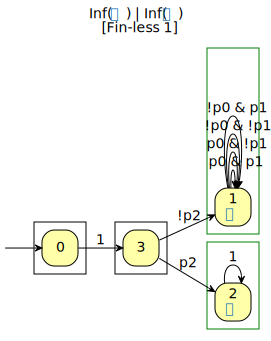

In [7]:
for not_eq_res in spot.automata('./not_eq.res'):
    display(not_eq_res)